In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False)  

# GET CURRENT PRICE DATA
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data 

In [2]:
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=2000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data 

In [3]:
def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df

In [4]:
def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None

baseurl:  https://min-api.cryptocompare.com/data/v2/histoday
timeframe:  day
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}
                high       low      open  volumefrom      volumeto     close conversionType conversionSymbol
time                                                                                                        
2022-09-29  19641.07  18848.01  19412.67    68669.51  1.327830e+09  19593.46         direct                 
2022-09-30  20180.46  19201.02  19593.46    73013.93  1.428754e+09  19425.63         direct                 
2022-10-01  19482.38  19188.77  19425.63    14808.24  2.860916e+08  19313.96         direct                 
2022-10-02  19394.33  18929.91  19313.96    25352.29  4.857993e+08  19058.15         direct                 
2022-10-03  19651.17  18988.80  19058.15    51988.64  1.003390e+09  19529.30         direct                 


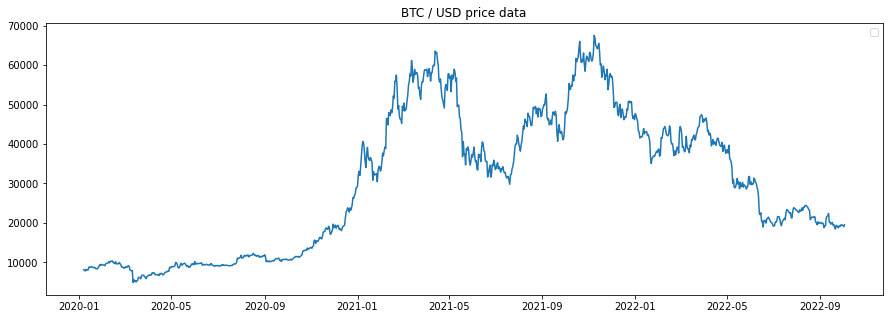

In [5]:
cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'day', 1000)
df = data_to_dataframe(data)

plot_data(df, cryptocurrency, target_currency)